<a href="https://colab.research.google.com/github/cristinaegus/Pandas_Python_IA/blob/main/SpanishWinesKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/spanish-wine-quality-dataset")

print("Path to dataset files:", path)

100%|██████████| 46.4k/46.4k [00:00<00:00, 35.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/spanish-wine-quality-dataset/versions/1


In [2]:
import os
os.chdir(path)
os.listdir()

['wines_SPA.csv']

In [10]:
import pandas as pd
df = pd.read_csv("wines_SPA.csv")
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


from matplotlib import pyplot as plt
_df_0['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['num_reviews'].plot(kind='hist', bins=20, title='num_reviews')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['body'].plot(kind='hist', bins=20, title='body')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('winery').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('wine').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='rating', y='num_reviews', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='num_reviews', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='price', y='body', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='body', y='acidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('winery')):
  _plot_series(series, series_name, i)
  fig.legend(title='winery', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('wine')):
  _plot_series(series, series_name, i)
  fig.legend(title='wine', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('year')):
  _plot_series(series, series_name, i)
  fig.legend(title='year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('region')):
  _plot_series(series, series_name, i)
  fig.legend(title='region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
_df_16['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['num_reviews'].plot(kind='line', figsize=(8, 4), title='num_reviews')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['body'].plot(kind='line', figsize=(8, 4), title='body')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['wine'].value_counts()
    for x_label, grp in _df_20.groupby('winery')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('winery')
_ = plt.ylabel('wine')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['year'].value_counts()
    for x_label, grp in _df_21.groupby('wine')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('wine')
_ = plt.ylabel('year')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['region'].value_counts()
    for x_label, grp in _df_22.groupby('year')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('year')
_ = plt.ylabel('region')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['type'].value_counts()
    for x_label, grp in _df_23.groupby('region')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('region')
_ = plt.ylabel('type')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['winery'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='rating', y='winery', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['wine'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='rating', y='wine', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['year'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='rating', y='year', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='rating', y='region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from matplotlib import pyplot as plt
_df_17['num_reviews'].plot(kind='line', figsize=(8, 4), title='num_reviews')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: title={'center': 'rating'}, xlabel='region'>

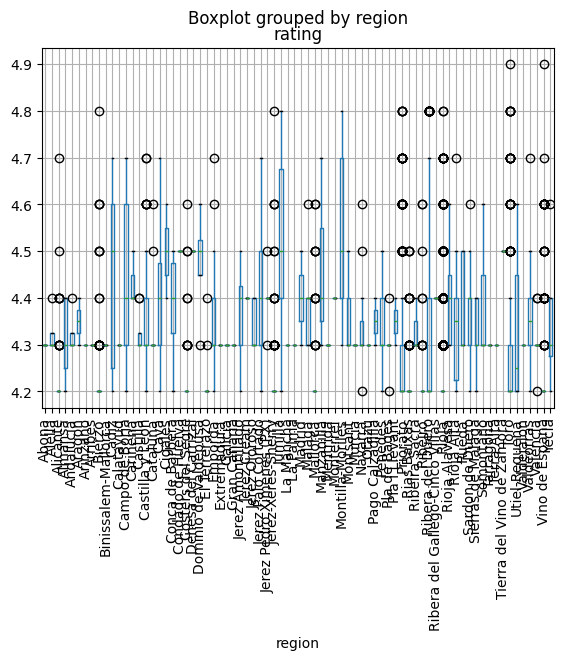

In [14]:
# Crea un boxplot en funcion de la columna "region"
df.boxplot(column="rating", by="region", rot=90)

In [16]:
# leer solo los valores de rating
rating = df["rating"]
rating


,rating
0,4.9
1,4.9
2,4.8
3,4.8
4,4.8
...,...
7495,4.2
7496,4.2
7497,4.2
7498,4.2


In [17]:
# cual es el maximo valor y cual es el minimo
print(rating.max())
print(rating.min())


4.9
4.2


<Axes: xlabel='price', ylabel='rating'>

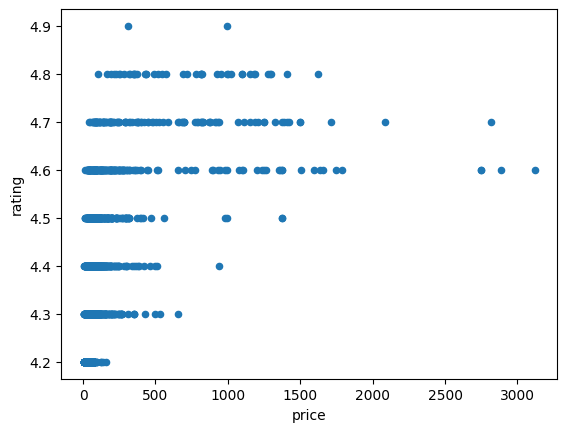

In [18]:
df.plot(kind='scatter', x='price', y='rating')

<Axes: xlabel='acidity', ylabel='price'>

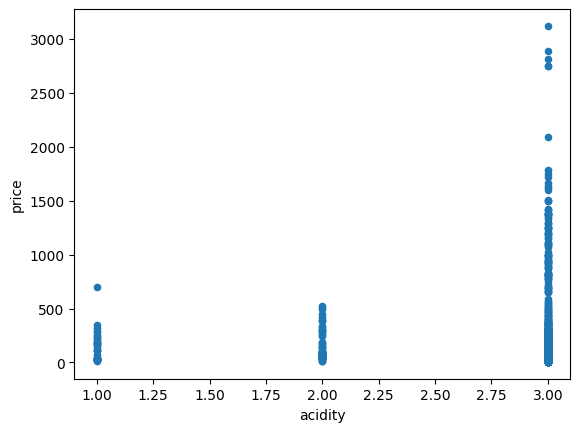

In [20]:
df.plot(kind='scatter', x='acidity', y='price')